In [1]:
#data loading
import pandas as pd
filename="/content/GSS7402.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames  kids  age  education  year  siblings  agefirstbirth ethnicity  \
0            1     0   25         14  2002         1            NaN      cauc   
1            2     1   30         13  2002         4           19.0      cauc   
2            3     1   55          2  2002         1           27.0      cauc   
3            4     2   57         16  2002         1           22.0      cauc   
4            5     2   71         12  2002         6           29.0      cauc   
...        ...   ...  ...        ...   ...       ...            ...       ...   
9115      9116     3   30         12  1998         2           21.0      cauc   
9116      9117     2   37         12  1998         3           23.0      cauc   
9117      9118     3   59          9  1998         5           20.0      cauc   
9118      9119     2   73         14  1998         5           22.0      cauc   
9119      9120     0   40         12  1998         4            NaN      cauc   

     city16 lowincome16 imm

In [2]:
##Checking for null values
a.isna().sum()##Checking for null values


,0
rownames,0
kids,0
age,0
education,0
year,0
siblings,0
agefirstbirth,5808
ethnicity,0
city16,0
lowincome16,0


In [3]:
fill_int_colums={6}
for i in fill_int_colums:
  a.iloc[:,i]=a.iloc[:,i].fillna(a.iloc[:,i].mean())

In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={7,8,9,10}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  kids  age  education  year  siblings  agefirstbirth  \
0            1     0   25         14  2002         1      22.630737   
1            2     1   30         13  2002         4      19.000000   
2            3     1   55          2  2002         1      27.000000   
3            4     2   57         16  2002         1      22.000000   
4            5     2   71         12  2002         6      29.000000   
...        ...   ...  ...        ...   ...       ...            ...   
9115      9116     3   30         12  1998         2      21.000000   
9116      9117     2   37         12  1998         3      23.000000   
9117      9118     3   59          9  1998         5      20.000000   
9118      9119     2   73         14  1998         5      22.000000   
9119      9120     0   40         12  1998         4      22.630737   

      ethnicity  city16  lowincome16  immigrant  
0             0       0            0          0  
1             0       1            0          0

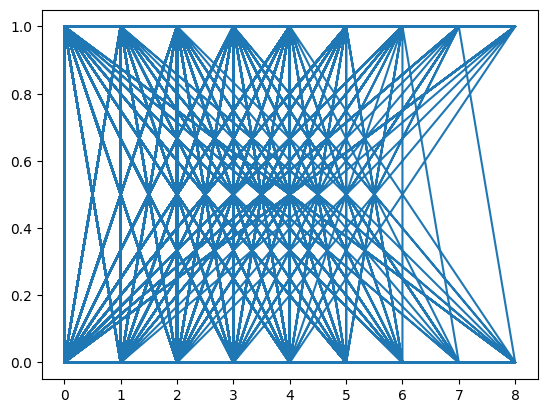

In [5]:
from matplotlib import pyplot as plt
target="immigrant"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 9120 artists>

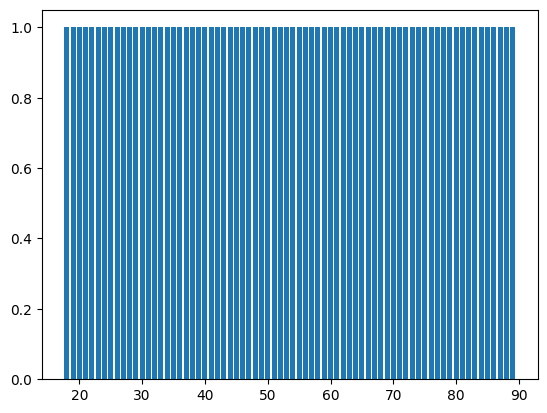

In [6]:
plt.bar(a[a.columns[2]],a[str(target)])

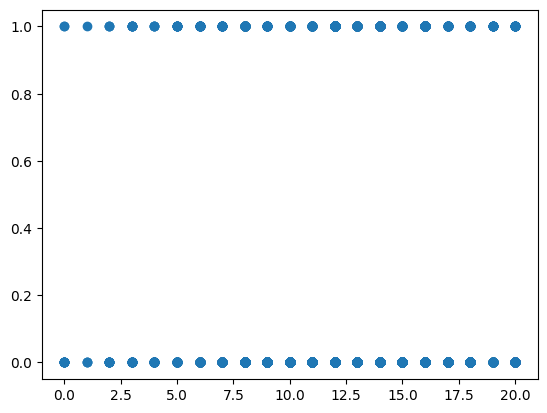

In [7]:
plt.scatter(a[a.columns[3]], a[str(target)])

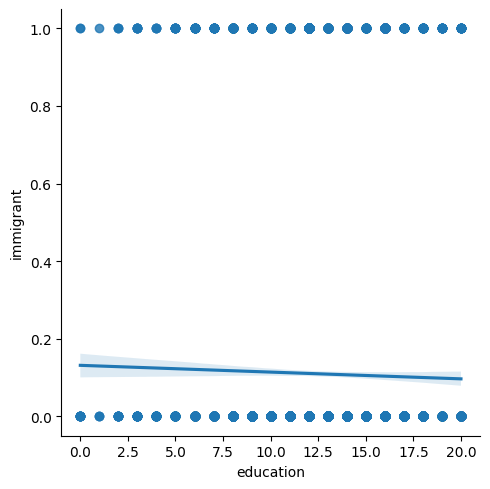

In [8]:
import seaborn as sns
#a["education"] = pd.to_numeric(a["education"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="education",y=str(target),data=a)

<Axes: xlabel='siblings', ylabel='immigrant'>

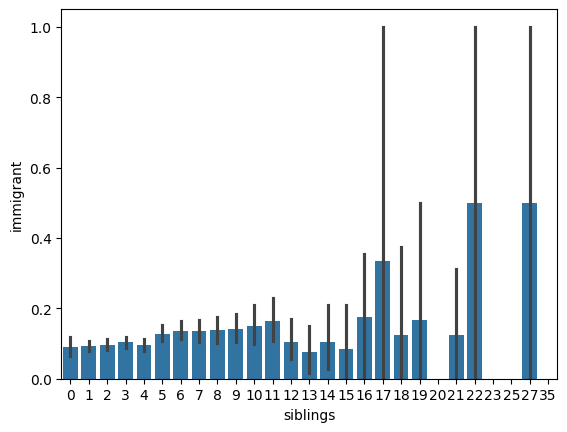

In [9]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='kids', ylabel='immigrant'>

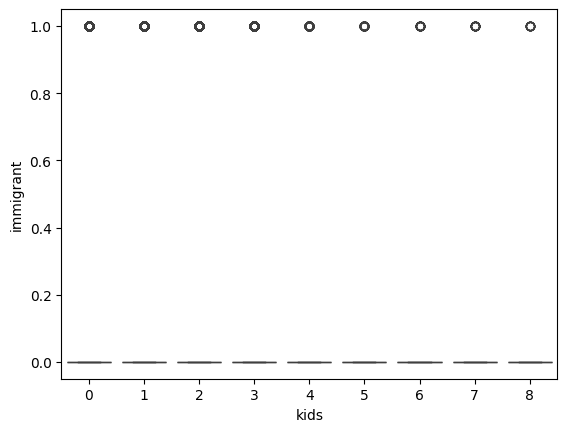

In [10]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-11-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='immigrant', ylabel='Density'>

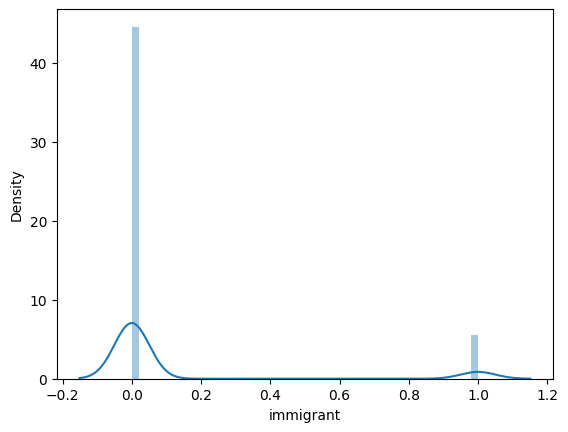

In [11]:
sns.distplot(a[str(target)])

<Axes: xlabel='kids', ylabel='Density'>

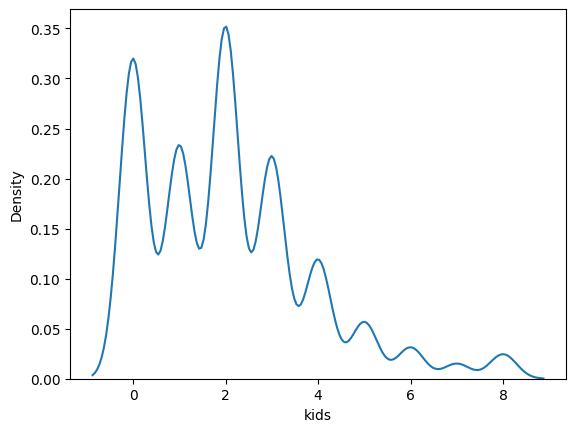

In [12]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='count'>

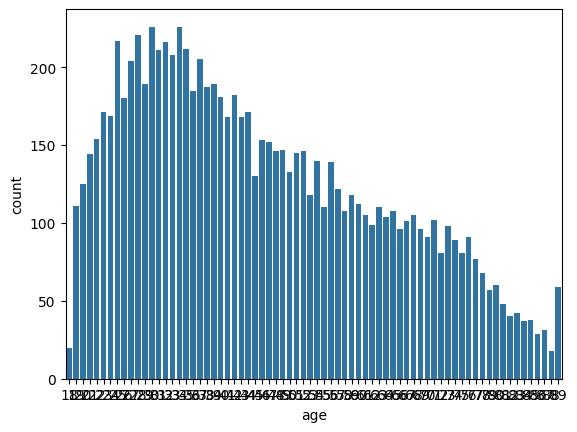

In [13]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

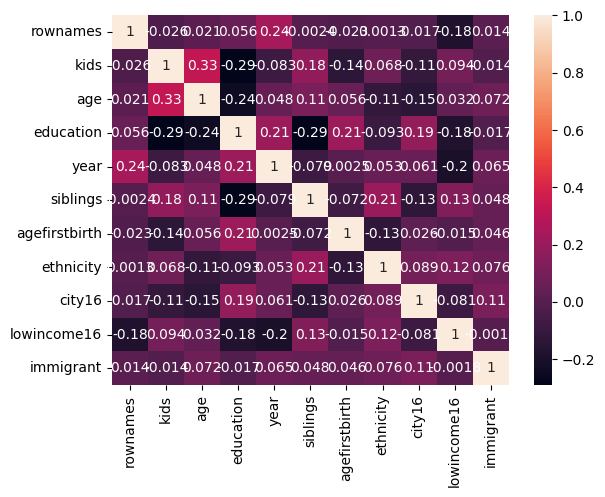

In [14]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

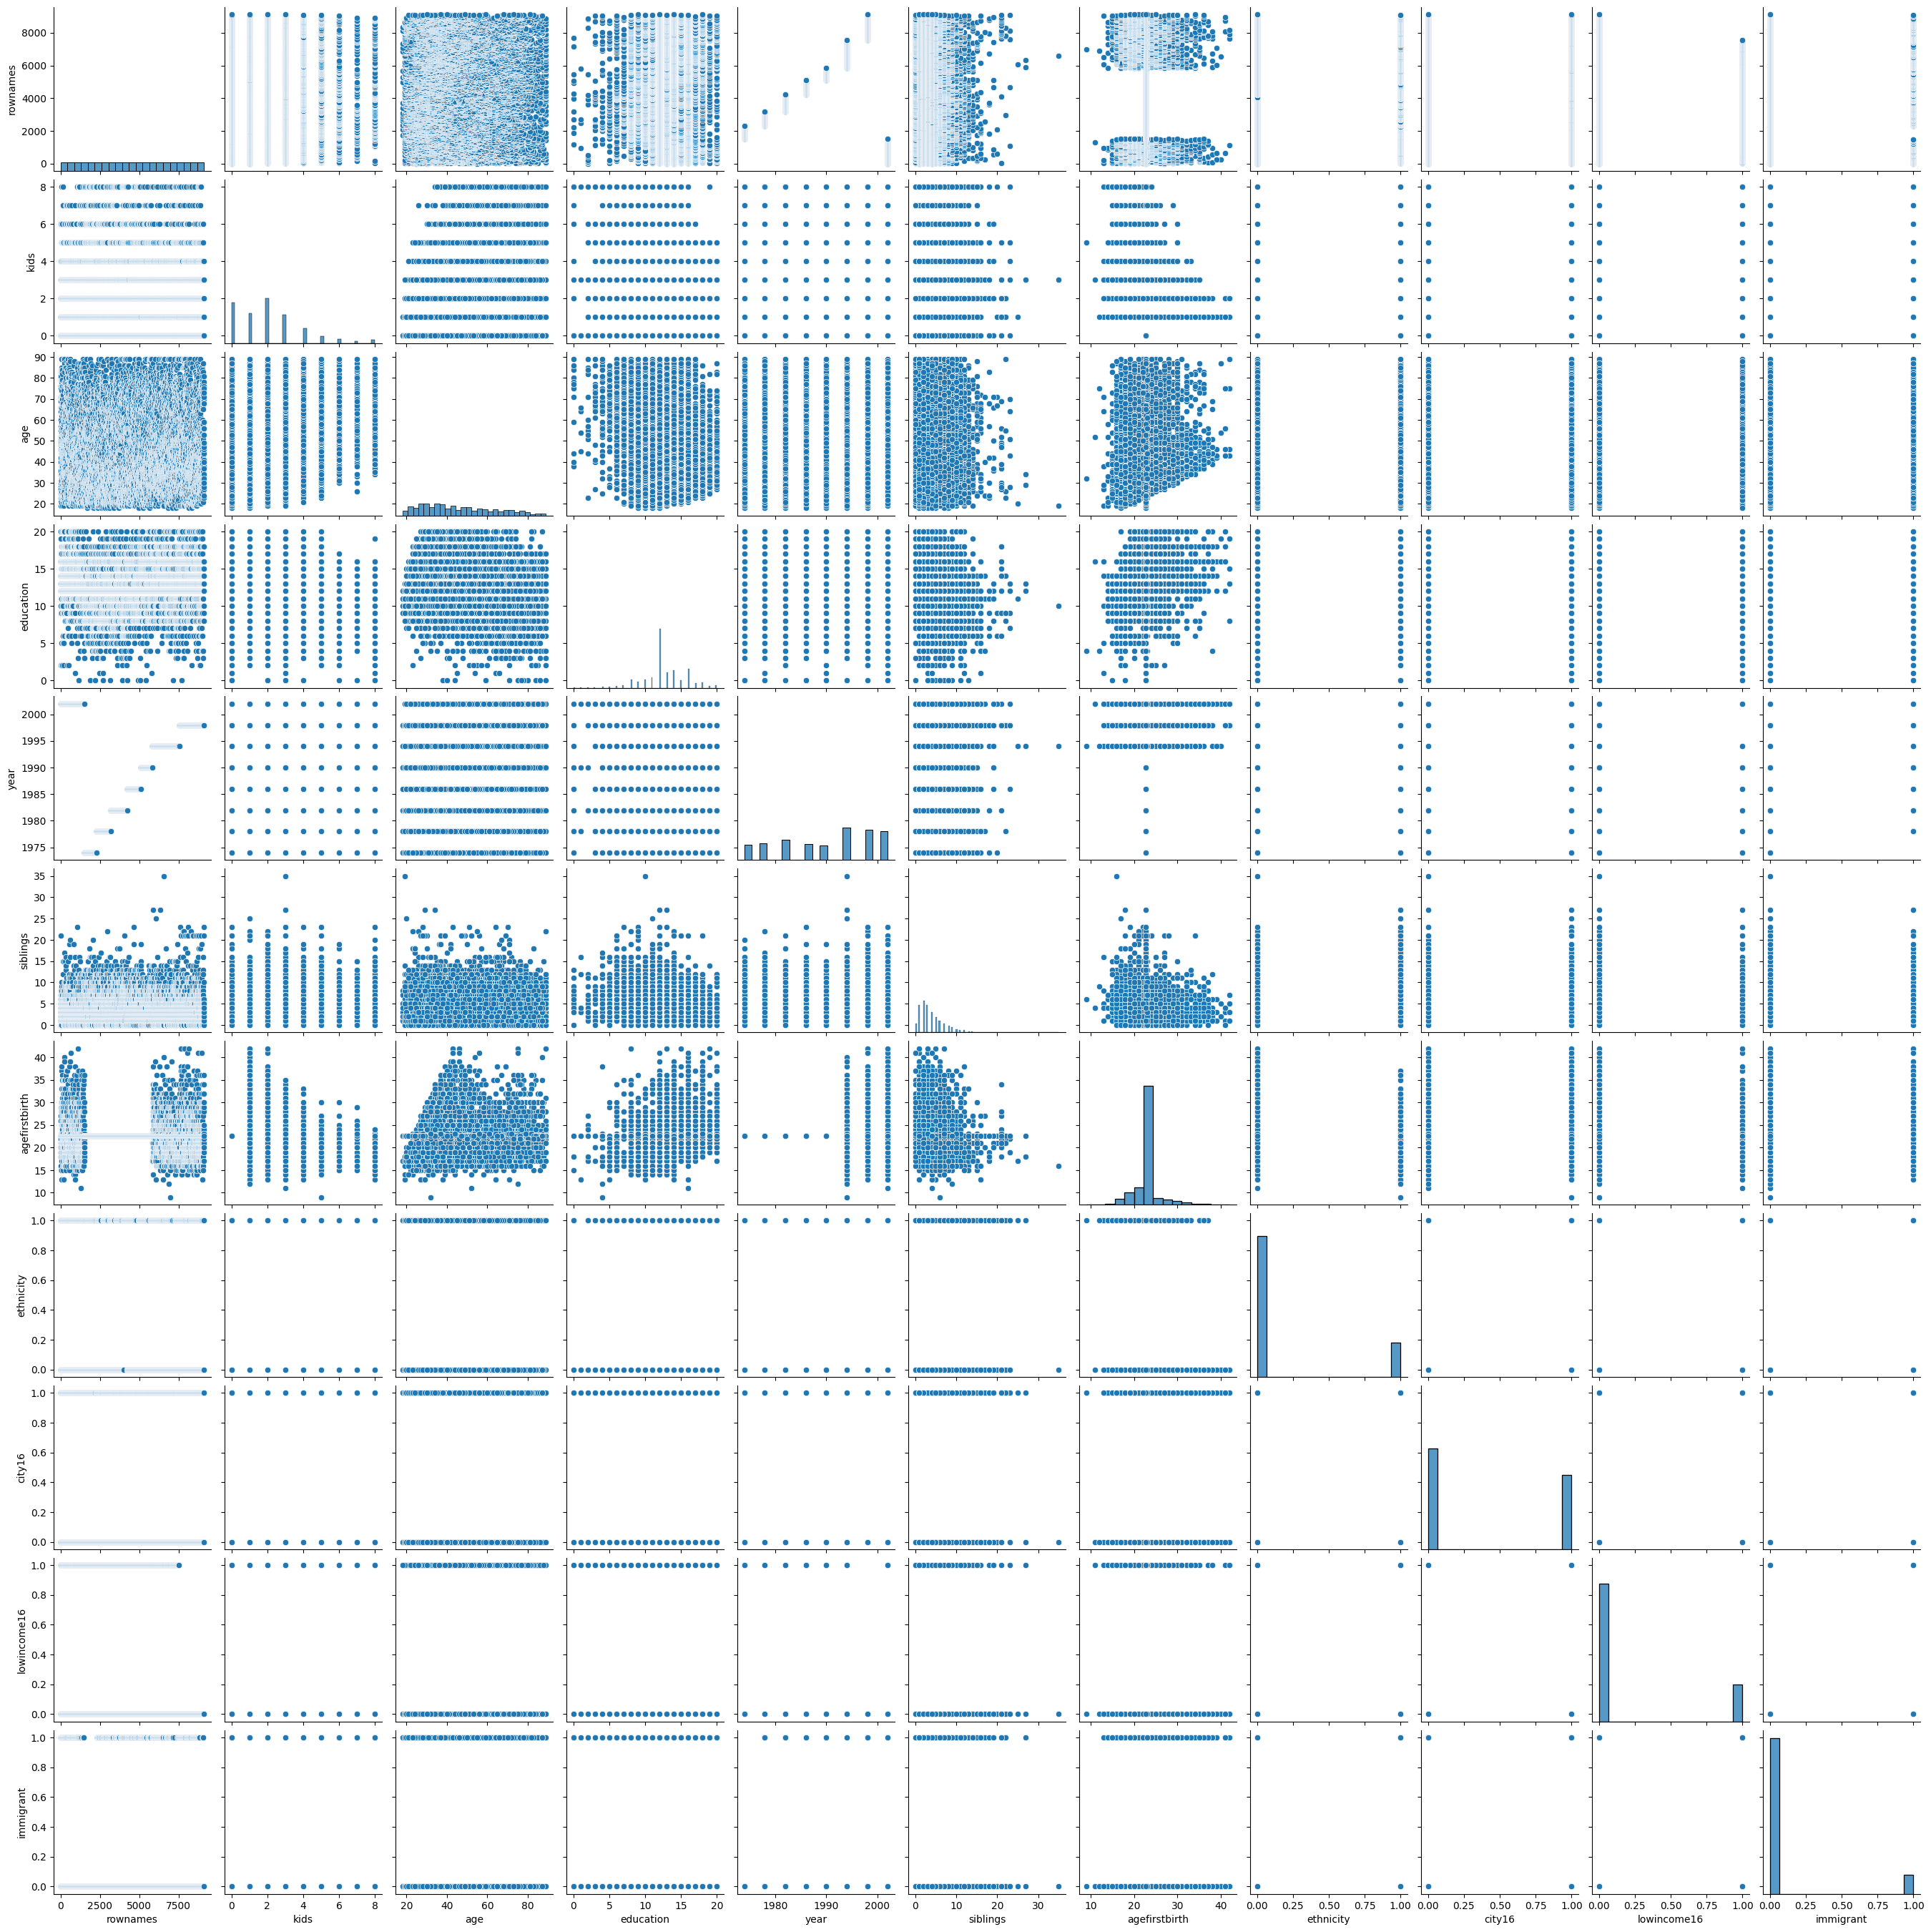

In [15]:
sns.pairplot(data=a)

In [16]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  kids  age  education  year  siblings  agefirstbirth  \
0            1     0   25         14  2002         1      22.630737   
1            2     1   30         13  2002         4      19.000000   
2            3     1   55          2  2002         1      27.000000   
3            4     2   57         16  2002         1      22.000000   
4            5     2   71         12  2002         6      29.000000   
...        ...   ...  ...        ...   ...       ...            ...   
9115      9116     3   30         12  1998         2      21.000000   
9116      9117     2   37         12  1998         3      23.000000   
9117      9118     3   59          9  1998         5      20.000000   
9118      9119     2   73         14  1998         5      22.000000   
9119      9120     0   40         12  1998         4      22.630737   

      ethnicity  city16  lowincome16  
0             0       0            0  
1             0       1            0  
2             0       0       

In [17]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
9115    0
9116    0
9117    0
9118    0
9119    0
Name: immigrant, Length: 9120, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
print(x_train)

      rownames  kids  age  education  year  siblings  agefirstbirth  \
8474      8475     2   35         10  1998         4      26.000000   
6797      6798     3   47         16  1994         0      21.000000   
3047      3048     0   29          9  1978         6      22.630737   
7157      7158     0   27         12  1994         7      22.630737   
6612      6613     3   52         12  1994         2      17.000000   
...        ...   ...  ...        ...   ...       ...            ...   
4913      4914     4   65         14  1986         7      22.630737   
7326      7327     0   18         11  1994         2      22.630737   
1631      1632     0   33         10  1974         1      22.630737   
8900      8901     2   57         14  1998         7      19.000000   
1602      1603     2   53         11  1974         3      22.630737   

      ethnicity  city16  lowincome16  
8474          0       0            0  
6797          0       0            0  
3047          0       0       

In [20]:
print(y_train)

8474    0
6797    0
3047    0
7157    0
6612    0
       ..
4913    0
7326    0
1631    0
8900    0
1602    0
Name: immigrant, Length: 7296, dtype: int64


In [21]:
print(x_test)

      rownames  kids  age  education  year  siblings  agefirstbirth  \
4395      4396     0   68          7  1986         0      22.630737   
439        440     2   50         13  2002         4      23.000000   
8554      8555     4   59         14  1998         8      24.000000   
6331      6332     3   38         16  1994         1      30.000000   
5827      5828     1   25         10  1990         3      22.630737   
...        ...   ...  ...        ...   ...       ...            ...   
9091      9092     1   27         16  1998         1      25.000000   
3607      3608     0   28         12  1982         4      22.630737   
8259      8260     3   79         13  1998        11      25.000000   
2034      2035     1   22         13  1974         3      22.630737   
2113      2114     5   35         12  1974         3      22.630737   

      ethnicity  city16  lowincome16  
4395          1       0            1  
439           0       0            0  
8554          1       0       

In [22]:
print(y_test)

4395    0
439     0
8554    0
6331    1
5827    1
       ..
9091    0
3607    0
8259    1
2034    0
2113    0
Name: immigrant, Length: 1824, dtype: int64


In [25]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(ypred)

[0 0 0 ... 0 0 0]


In [29]:
print(model.predict([[4396,0,68,7,1986,0,22.630737,1,0,1]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.819078947368421


In [32]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[1443  183]
 [ 147   51]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [34]:
print(ypred)

[0 0 0 ... 0 0 0]


In [35]:
print(model.predict([[4396,0,68,7,1986,0,22.630737,1,0,1]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8119517543859649


In [37]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[1436  190]
 [ 153   45]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [43]:
print(ypred)

[0 0 0 ... 0 0 0]


In [44]:
print(model.predict([[4396,0,68,7,1986,0,22.630737,1,0,1]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8903508771929824


In [46]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[1616   10]
 [ 190    8]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1626
           1       0.44      0.04      0.07       198

    accuracy                           0.89      1824
   macro avg       0.67      0.52      0.51      1824
weighted avg       0.85      0.89      0.85      1824

